# Week 3 Homework - Jon Workman

In [180]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
%matplotlib inline

In [181]:
df = pd.read_csv('seattleWeather_1948-2017.csv').dropna()

## Clean data and add feature

In [182]:
df.RAIN = df.RAIN.astype(int)
df['DATE'] =  pd.to_datetime(df['DATE'], format='%Y-%m-%d')
#df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
#df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
#df['DAY'] = pd.DatetimeIndex(df['DATE']).day
df['Actual_P'] = df['PRCP']
# look at the last 7 days to predict if it will rain on the 8th day.


In [187]:
# Avg precipitation from last 7 days
for i in len(df['PRCP']):
    print(i)

TypeError: 'int' object is not iterable

In [185]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,Actual_P
0,1948-01-01,0.47,51,42,1,0.47
1,1948-01-02,0.59,45,36,1,0.59
2,1948-01-03,0.42,45,35,1,0.42
3,1948-01-04,0.31,45,34,1,0.31
4,1948-01-05,0.17,45,32,1,0.17


## Visualisation

In [136]:
df['RAIN'] = df["RAIN"].map(lambda i: 1 if i==True else 0)
df['RAIN'].value_counts()

0    14648
1    10900
Name: RAIN, dtype: int64

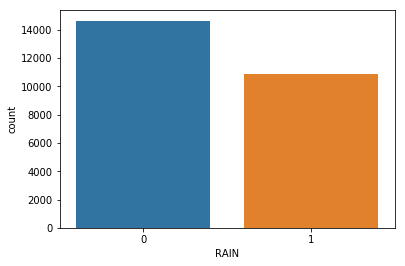

In [137]:
sns.countplot(data=df, x='RAIN')

In [143]:
chance_of_rain = 10900 / (14648 + 10900)
chance_of_rain

0.4266478785032096

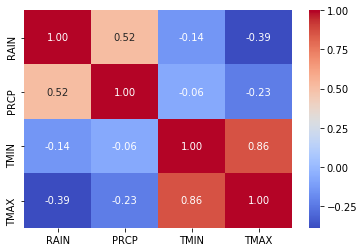

In [6]:
g = sns.heatmap(df[['RAIN', 'PRCP','TMIN','TMAX']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

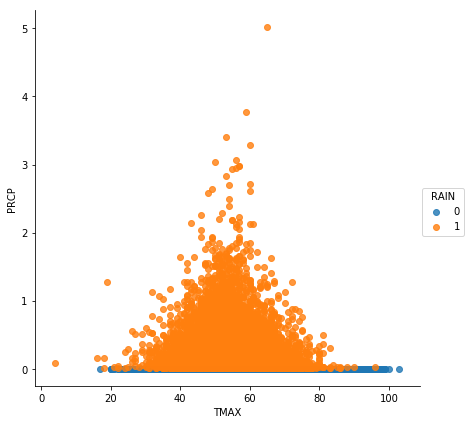

In [7]:
g = sns.lmplot(x='TMAX', y= 'PRCP', data=df, fit_reg=False, hue='RAIN', size=6)

## Split dataset

In [8]:
start1 = pd.datetime(1950, 1, 1)
end1 = pd.datetime(2009, 12, 31)
start2 = pd.datetime(2010,1,1)
end2 = pd.datetime(2017,12,31)

df_train = df[(df.DATE >= start1) & (df.DATE <= end1)]
df_validation = df[(df.DATE >= start2) & (df.DATE <= end2)]

In [9]:
df_train.shape

(21912, 5)

In [10]:
df_validation.shape

(2905, 5)

In [11]:
def seven_days():
    pass



In [104]:
index = df[df['DATE'] == start1].index

In [113]:
str1 = (list(index))
index1 = str1.pop()

In [122]:
start = index1
test = start + 6
image = df.ix[start:test]

In [123]:
print(start)
print(test)

731
737


In [124]:
image

,DATE,PRCP,TMAX,TMIN,RAIN
731,1950-01-01,0.25,32,24,1
732,1950-01-02,0.01,24,6,1
733,1950-01-03,0.10,26,6,1
734,1950-01-04,0.00,28,14,0
735,1950-01-05,0.08,38,22,1
736,1950-01-06,0.95,39,35,1
737,1950-01-07,0.31,37,33,1


## Train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['DATE', 'RAIN'],axis=1),df_train['RAIN'],
test_size=0.30, random_state=0)

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logpredictions = logmodel.predict(X_test)

In [14]:
print(accuracy_score(y_test,logpredictions))

0.92576817767


[[3769   21]
 [ 467 2317]]


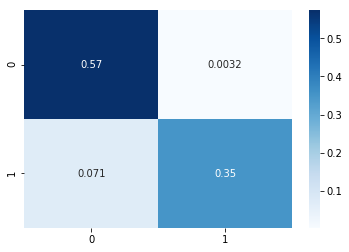

In [15]:
print(confusion_matrix(y_test,logpredictions))
sns.heatmap(confusion_matrix(y_test, logpredictions) / len(y_test), cmap='Blues', annot=True)

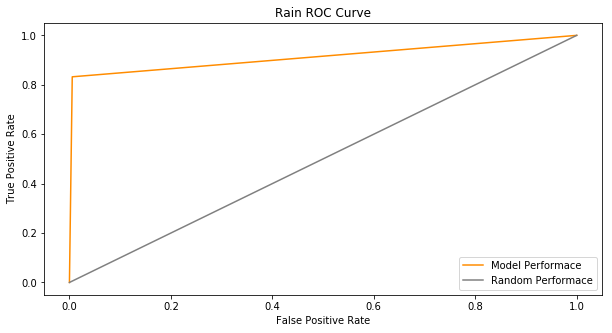

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, logpredictions)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rain ROC Curve')
plt.legend(loc="lower right")

In [17]:
print(classification_report(y_test,logpredictions))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94      3790
          1       0.99      0.83      0.90      2784

avg / total       0.93      0.93      0.92      6574



## Validate

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_validation.drop(['DATE', 'RAIN'],axis=1),df_validation['RAIN'],
test_size=0.30,random_state=0)

In [21]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_test2,y_test2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
logpredictions2 = logmodel2.predict(X_test2)

In [23]:
print(accuracy_score(y_test2,logpredictions2))

0.852064220183


[[413  48]
 [ 81 330]]


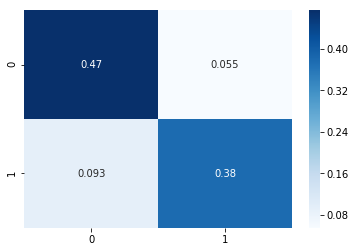

In [24]:
print(confusion_matrix(y_test2,logpredictions2))
sns.heatmap(confusion_matrix(y_test2, logpredictions2) / len(y_test2), cmap='Blues', annot=True)

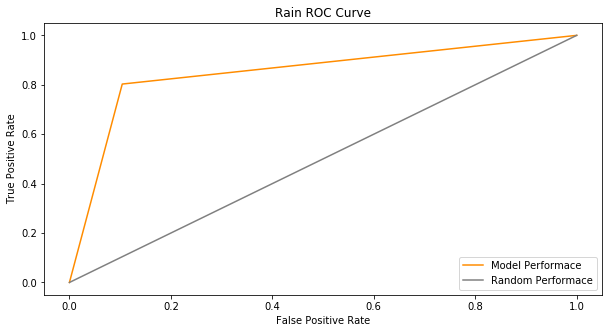

In [25]:
fpr, tpr, thresholds = roc_curve(y_test2, logpredictions2)

fig, ax = plt.subplots(1, figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rain ROC Curve')
plt.legend(loc="lower right")

In [26]:
print(classification_report(y_test2,logpredictions2))

             precision    recall  f1-score   support

          0       0.84      0.90      0.86       461
          1       0.87      0.80      0.84       411

avg / total       0.85      0.85      0.85       872

